In [15]:
#imports

In [1]:
#to supress warning regarding version not matching up or something
"""From version 0.10 passing these as positional arguments will result in an error"""
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to save the model
#joblib > pickle because it is more efficient with objects that carry larg numpy arrays
import joblib

In [3]:
import librosa
import soundfile

In [4]:
import os, glob, pickle

In [5]:
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [7]:
#extract features from the sound
def extract_features(file_name, chroma, mfcc, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        results = np.array([])
        x = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        
        if chroma:
            stft = np.abs(librosa.stft(x))
            chroma = np.mean(librosa.feature.chroma_stft(S = stft, sr = sample_rate).T, axis = 0)
            """test = librosa.feature.chroma_stft(S = stft, sr = sample_rate).T
            test_t = test.T"""
            results = np.hstack((results, chroma))
            
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y = x, sr = sample_rate, n_mfcc = 40).T, axis = 0)
            """test = librosa.feature.mfcc(y = x, sr = sample_rate, n_mfcc = 40)"""
            results = np.hstack((results, mfccs))
            
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(x, sr = sample_rate).T, axis = 0)
            """test = librosa.feature.melspectrogram(x, sr = sample_rate)"""
            results = np.hstack((results, mel))
    return results

In [8]:
#dictionary to hold emotions that the dataset has and the emotions that we need
emotions = {
    '01' : 'neutral',
    '02' : 'calm',
    '03' : 'happy',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fearful',
    '07' : 'disgust',
    '08' : 'surprised'
}

emotions_to_observe = ['calm', 'happy', 'fearful', 'disgust']

In [9]:
#load data, extract features of each sound track and split train test
def load_data_and_split(test_size = 0.25):
    #x for features, y for emotions
    x, y = [], []
    for file in glob.glob("./dataset/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        if emotion not in emotions_to_observe:
            continue
        feature = extract_features(file, mfcc = True, chroma = True, mel = True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size = test_size)
    #return x, y

In [10]:
#split the dataset like your parents did
x_train, x_test, y_train, y_test = load_data_and_split()

In [11]:
print(x_train.shape, x_test.shape)
#180 features, 576 and 192 datapoint in train and test sets respectively

(576, 180) (192, 180)


In [12]:
#now, the good part (can't skip to it though)
#initialize Multi Layer Perceptron(MLP) Classifier
model = MLPClassifier(alpha=0.01, batch_size=192, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [13]:
#fit model
model.fit(x_train, y_train)

MLPClassifier(alpha=0.01, batch_size=192, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [14]:
#prediction making. (call Prof. Trelawney, maybe?)
predictions = model.predict(x_test)

In [15]:
print(predictions)

['fearful' 'calm' 'calm' 'fearful' 'disgust' 'happy' 'disgust' 'calm'
 'happy' 'fearful' 'happy' 'calm' 'fearful' 'happy' 'calm' 'disgust'
 'calm' 'fearful' 'disgust' 'fearful' 'fearful' 'disgust' 'fearful'
 'disgust' 'calm' 'calm' 'calm' 'disgust' 'disgust' 'happy' 'calm'
 'fearful' 'disgust' 'disgust' 'disgust' 'disgust' 'fearful' 'happy'
 'disgust' 'disgust' 'calm' 'disgust' 'happy' 'happy' 'disgust' 'calm'
 'fearful' 'disgust' 'fearful' 'happy' 'disgust' 'disgust' 'calm' 'calm'
 'disgust' 'happy' 'fearful' 'happy' 'fearful' 'calm' 'happy' 'happy'
 'fearful' 'calm' 'disgust' 'happy' 'calm' 'disgust' 'disgust' 'calm'
 'fearful' 'fearful' 'disgust' 'fearful' 'calm' 'calm' 'fearful' 'disgust'
 'fearful' 'disgust' 'calm' 'disgust' 'calm' 'calm' 'disgust' 'disgust'
 'calm' 'fearful' 'fearful' 'fearful' 'fearful' 'fearful' 'fearful'
 'disgust' 'disgust' 'calm' 'fearful' 'fearful' 'happy' 'calm' 'calm'
 'calm' 'disgust' 'disgust' 'calm' 'disgust' 'fearful' 'fearful' 'fearful'
 'disgust' 'c

In [16]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.71875


In [17]:
#save model
joblib.dump(model, 'model/smol_model.pkl')

['model/smol_model.pkl']

In [18]:
model2 = joblib.load('model/smol_model.pkl')

In [19]:
preds_2 = model2.predict(x_test)
accu = accuracy_score(y_test, preds_2)

In [20]:
print(accu)

0.71875


In [22]:
#testing things with a sample sound from the dataset
#./test_sound_03-01-06-02-02-01-21.wav file I renamed to test, might not be available
test_features = extract_features('./test_sound_03-01-06-02-02-01-21.wav', True, True, True)
test_predictions = model.predict(test_features.reshape(1, -1))

In [23]:
test_features.reshape(1, -1)

array([[ 6.48414195e-01,  6.40534401e-01,  6.43361211e-01,
         6.74933791e-01,  6.62627637e-01,  6.76647723e-01,
         7.10181713e-01,  7.81257808e-01,  7.82246172e-01,
         7.69857585e-01,  7.42866755e-01,  6.84088945e-01,
        -4.68747345e+02,  4.84515991e+01, -1.35927353e+01,
         1.63836994e+01, -2.76502132e+00, -7.70163965e+00,
        -7.45595598e+00, -1.62535057e+01, -7.36014843e+00,
        -2.37753630e+00, -1.24746122e+01, -9.15337920e-01,
        -3.85157847e+00, -8.84522915e-01, -5.85053968e+00,
        -7.07085371e+00, -2.70024228e+00, -5.26100111e+00,
        -5.45318937e+00, -4.69488335e+00, -4.57296896e+00,
        -5.49660063e+00, -3.68476152e+00, -3.87589741e+00,
        -3.01609468e+00, -1.44686496e+00, -9.46582556e-01,
        -3.27571273e+00, -3.77673364e+00, -3.42828560e+00,
        -3.58353186e+00, -2.28138852e+00, -2.00308585e+00,
        -3.75584579e+00, -4.23369837e+00, -1.62946105e-01,
        -1.10353887e+00,  7.97449946e-01, -1.50440025e+0

In [24]:
test_features

array([ 6.48414195e-01,  6.40534401e-01,  6.43361211e-01,  6.74933791e-01,
        6.62627637e-01,  6.76647723e-01,  7.10181713e-01,  7.81257808e-01,
        7.82246172e-01,  7.69857585e-01,  7.42866755e-01,  6.84088945e-01,
       -4.68747345e+02,  4.84515991e+01, -1.35927353e+01,  1.63836994e+01,
       -2.76502132e+00, -7.70163965e+00, -7.45595598e+00, -1.62535057e+01,
       -7.36014843e+00, -2.37753630e+00, -1.24746122e+01, -9.15337920e-01,
       -3.85157847e+00, -8.84522915e-01, -5.85053968e+00, -7.07085371e+00,
       -2.70024228e+00, -5.26100111e+00, -5.45318937e+00, -4.69488335e+00,
       -4.57296896e+00, -5.49660063e+00, -3.68476152e+00, -3.87589741e+00,
       -3.01609468e+00, -1.44686496e+00, -9.46582556e-01, -3.27571273e+00,
       -3.77673364e+00, -3.42828560e+00, -3.58353186e+00, -2.28138852e+00,
       -2.00308585e+00, -3.75584579e+00, -4.23369837e+00, -1.62946105e-01,
       -1.10353887e+00,  7.97449946e-01, -1.50440025e+00, -1.12958086e+00,
        3.67918183e-05,  

In [25]:
test_predictions

array(['fearful'], dtype='<U7')

In [50]:
"""
file = "./dataset/Actor_01/03-01-01-01-01-01-01.wav"
#with np.printoptions(threshold=np.inf):
print(extract_features(file))
"""

16000


In [80]:
"""
file = "./dataset/Actor_01/03-01-01-01-01-01-01.wav"
#with np.printoptions(threshold=np.inf):
print(type(extract_features(file, chroma = False, mfcc = False, mel = True)))
"""

<class 'numpy.ndarray'>


/tmp/ipykernel_143/3671670775.py:21: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(x, sr = sample_rate).T, axis = 0)
/tmp/ipykernel_143/3671670775.py:22: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  test = librosa.feature.melspectrogram(x, sr = sample_rate)


In [66]:
"""
import matplotlib.pyplot as plt
import librosa.display
"""

In [64]:
"""
y, sr = librosa.load(librosa.ex('nutcracker'), duration=15)
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
"""

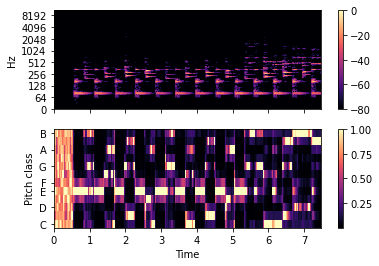

In [68]:
"""
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
"""